In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from scipy import fftpack
from scipy.signal import argrelextrema, find_peaks

In [3]:
import sys
#sys.path.append('C:\\Users\\claudio.caccia\\Dropbox\\00_Aero\\10_Tesi\\001_rho\\copy\\python')
sys.path.append('../../../utils/python')

In [4]:
import read_forces as rf
import mbdyn_reader as mbd_r

In [5]:
caselist = ['CFD1','CFD2','CFD3']
#meshlist = ['normal','fine','double'] #,'./FSI3-double/']
#meshlist = ['']

datafolder ='/Fluid/postProcessing/forces/0/'

In [6]:


raw_data = {}

for curr_case in caselist:
    curr_data_folder = './'+curr_case+datafolder
        
    if not os.path.exists(curr_data_folder):
        print("Folder "+curr_data_folder+" not found!")
        break
        
    os.chdir(curr_data_folder)
    print("reading folder: {0}".format(curr_case))

    raw_data[curr_case] = {}
        
    tf_mbd, fof_mbd = rf.read_of_force('force.dat')
    tf_mbd, mof_mbd = rf.read_of_force('moment.dat')
        
    raw_data[curr_case]['tf_mbd'] = tf_mbd
    raw_data[curr_case]['fof_mbd'] = fof_mbd
    raw_data[curr_case]['mof_mbd'] = mof_mbd
        
    os.chdir('../../../../../')
        


reading folder: CFD1
reading folder: CFD2
reading folder: CFD3


### Domain thickness

In [7]:
h=1.e-2

# Plot Forces

## CFD1

In [8]:
curr_case = caselist[0]

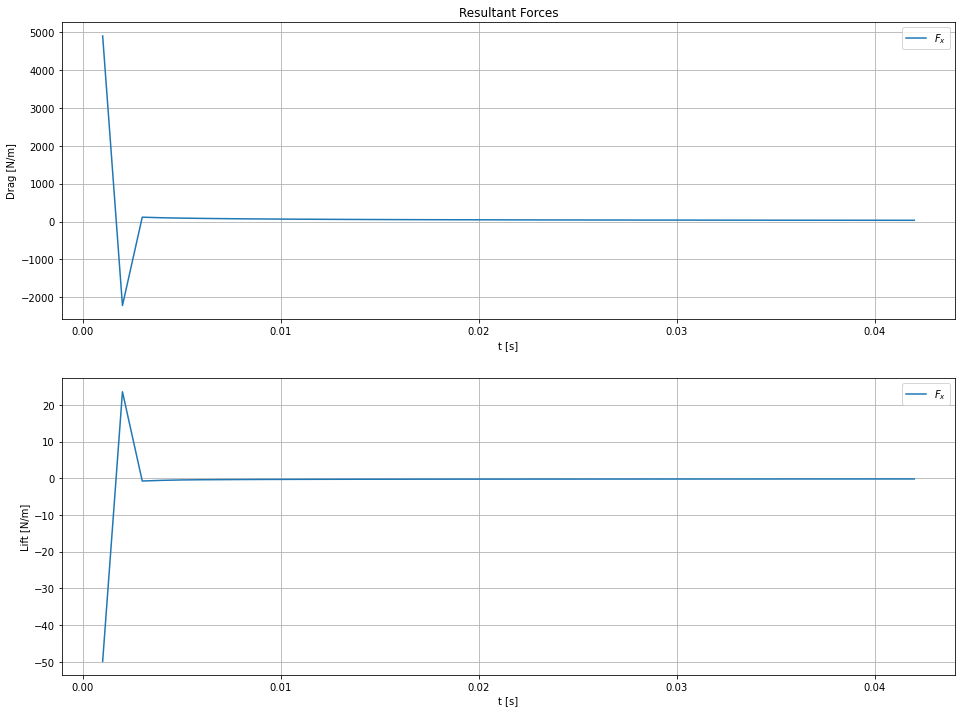

In [10]:
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)

plt.plot(raw_data[curr_case]['tf_mbd'], raw_data[curr_case]['fof_mbd'][:,0]/h,label=r'$F_x$')

#plt.xlim([0,8])
#plt.ylim([10,20])
plt.grid()
plt.legend()

plt.title(r'Resultant Forces')
plt.xlabel("t [s]")
plt.ylabel(r"Drag [N/m]")

plt.subplot(2,1,2)
plt.plot(raw_data[curr_case]['tf_mbd'], raw_data[curr_case]['fof_mbd'][:,1]/h,label=r'$F_y$') 
#plt.xlim([2,8])
#plt.ylim([0,5])
plt.grid()
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("Lift [N/m]");

# plt.savefig('forces_'+curr_dir[2:-1]+'.png')

In [11]:
t_start = 7000

mean_drag = np.mean(raw_data[curr_case]['fof_mbd'][t_start:-1,0]/h)

mean_lift = np.mean(raw_data[curr_case]['fof_mbd'][t_start:-1,1]/h)


print('Drag: {0} N/m'.format(mean_drag))

print('Lift: {0} N/m'.format(mean_lift))


Drag: 113.2467655519512 N/m
Lift: -0.8851884129963414 N/m


## CFD2

In [12]:
curr_case = caselist[1]

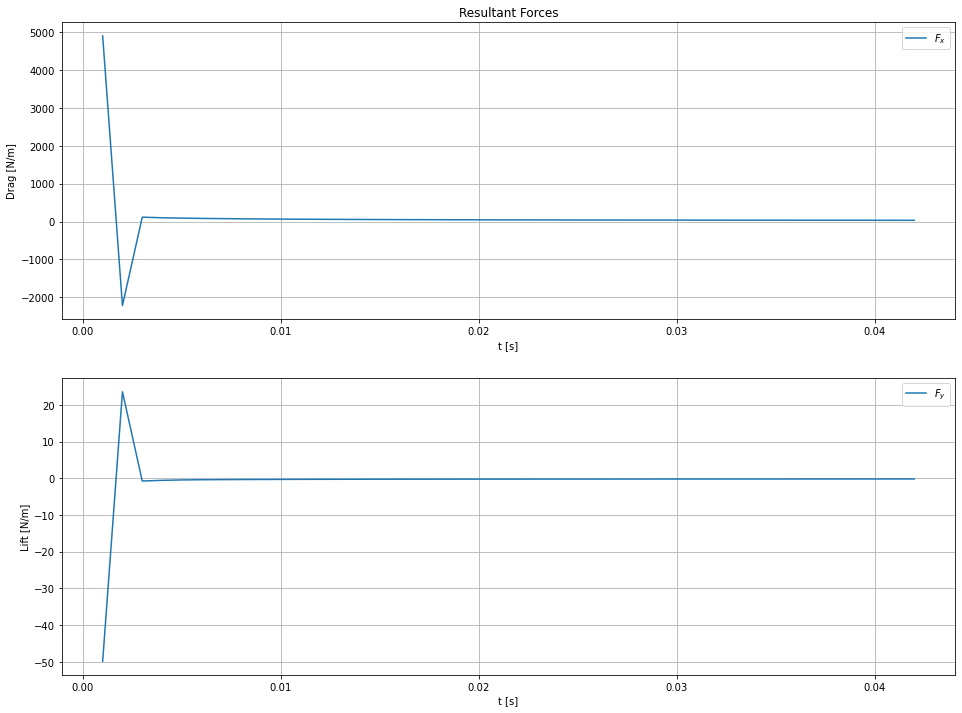

In [12]:

plt.figure(figsize=(16,12))

plt.subplot(2,1,1)

plt.plot(raw_data[curr_case]['tf_mbd'], raw_data[curr_case]['fof_mbd'][:,0]/h,label=r'$F_x$')

#plt.xlim([2,8])
#plt.ylim([130,145])
plt.grid()
plt.legend()

plt.title(r'Resultant Forces')
plt.xlabel("t [s]")
plt.ylabel(r"Drag [N/m]")

plt.subplot(2,1,2)
plt.plot(raw_data[curr_case]['tf_mbd'], raw_data[curr_case]['fof_mbd'][:,1]/h,label=r'$F_y$') #

#plt.xlim([2,8])
#plt.ylim([10,12])
plt.grid()
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("Lift [N/m]");

#plt.subplot(3,1,3)
#plt.plot(str_force[:,0],str_force[:,6]/h,lw=2.,ls='-.',label=r'$M_z$ MBDyn') #,color=[0.0,0.6,0.0]
#plt.plot(tf_mbd, mof_mbd[:,2]/h,lw=1.,label=r'$M_z$ OpenFOAM') # ,color=[1.,0.,0.0]
#plt.xlim([4.5,6.5])
#plt.ylim([-100,100])
#plt.grid()
#plt.legend(fontsize=font,loc=8)
#plt.xlabel("t [s]",fontsize=font)
#plt.ylabel(r"M [N]",fontsize=font);


# plt.savefig('forces_'+curr_dir[2:-1]+'.png')

In [14]:
t_start = 7000

mean_drag = np.mean(raw_data[curr_case]['fof_mbd'][t_start:-1,0]/h)

mean_lift = np.mean(raw_data[curr_case]['fof_mbd'][t_start:-1,1]/h)

print('Drag: {0} N/m'.format(mean_drag))

print('Lift: {0} N/m'.format(mean_lift))


Drag: 113.2467655519512 N/m
Lift: -0.8851884129963414 N/m


## CFD3

In [15]:
curr_case = caselist[2]

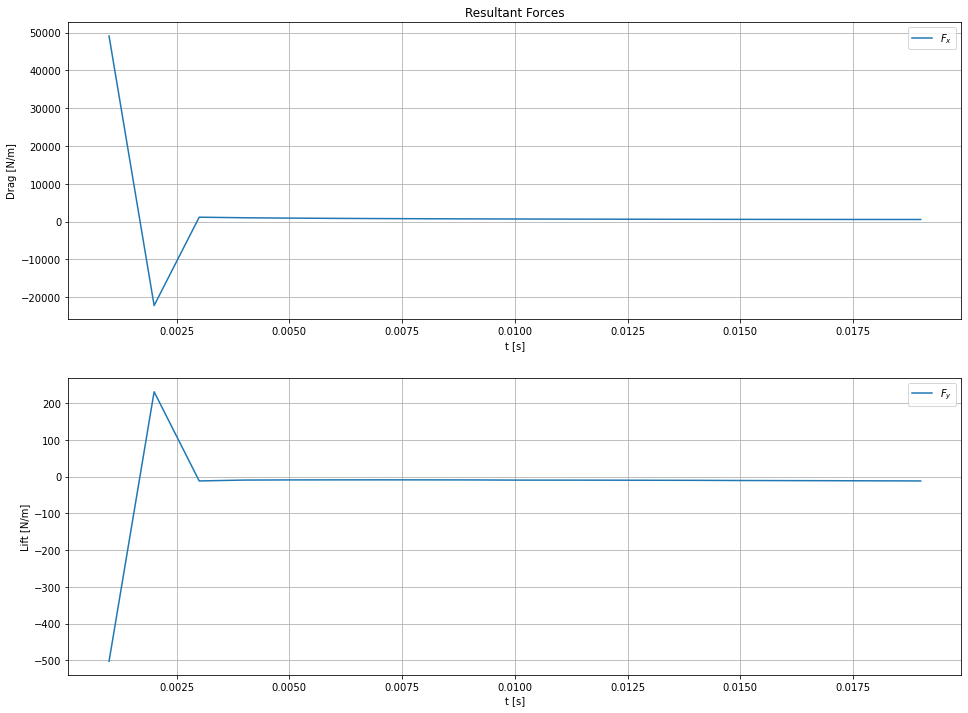

In [16]:

plt.figure(figsize=(16,12))

plt.subplot(2,1,1)

plt.plot(raw_data[curr_case]['tf_mbd'], raw_data[curr_case]['fof_mbd'][:,0]/h,label=r'$F_x$')

#plt.xlim([6,10])
#plt.ylim([430,450])
plt.grid()
plt.legend()

plt.title(r'Resultant Forces')
plt.xlabel("t [s]")
plt.ylabel(r"Drag [N/m]")

plt.subplot(2,1,2)
plt.plot(raw_data[curr_case]['tf_mbd'], raw_data[curr_case]['fof_mbd'][:,1]/h,label=r'$F_y$')
#plt.xlim([6,10])
#plt.ylim([10,12])
plt.grid()
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("Lift [N/m]");


# plt.savefig('forces_'+curr_dir[2:-1]+'.png')

In [17]:
def find_crossings(sig, offset = 0):
    indices = np.where(( (sig[1:]-offset) >= 0) & ( (sig[:-1]-offset) < 0))
    return indices[0]

In [18]:
def freq_from_crossings(sig, fs=1000):
    """Estimate frequency by counting zero crossings
    
    Pros: Fast, accurate (increasing with data length).  Works well for long low-noise sines, square, triangle, etc.
    
    Cons: Doesn't work if there are multiple zero crossings per cycle, low-frequency baseline shift, noise, etc.
    
    """
    # Find all indices right before a rising-edge zero crossing
    indices = find_crossings(sig)
    
    # Naive (Measures 1000.185 Hz for 1000 Hz, for instance)
    #crossings = indices
    
    # More accurate, using linear interpolation to find intersample 
    # zero-crossings (Measures 1000.000129 Hz for 1000 Hz, for instance)
    crossings = [i - sig[i] / (sig[i+1] - sig[i]) for i in indices]
    
    # Some other interpolation based on neighboring points might be better. Spline, cubic, whatever
    
    return fs / np.average(np.diff(crossings)), indices[0], indices[-1]

In [19]:
def comp_freq(x, f_s=1000, plot_freq=False):
    # f_s Sampling rate, or number of measurements per second
    offset0 = np.mean(x)
    print("avg signal = {0}".format(offset0))
    
    X = fftpack.fft(x-offset0)
    freqs = fftpack.fftfreq(len(x)) * f_s
    
    if plot_freq:
        fig, ax = plt.subplots()
        ax.stem(freqs, np.abs(X))
        ax.set_xlabel('Frequency in Hertz [Hz]')
        ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
        ax.set_xlim(0, 7.5)
        #ax.set_ylim(-5, 110)

    fd = freqs[np.argmax(np.abs(X))]
    # print("max freqency = {0}".format(fd))
    
    # for local maxima
    #m_max = argrelextrema(x, np.greater)
    
    m_max, _ = find_peaks(x, height=offset0, distance = 50)
    
    # for local minima
    # m_min = argrelextrema(x, np.less)
    
    m_min, _ = find_peaks(-x, height=-offset0, distance = 50)
    
    # print(m_max, x[m_max])
    # print(x[m_min])
    
    # plt.figure(figsize=(16,10))
    # plt.plot(x)
    # plt.plot(m_max,x[m_max],'o')
    
    #print(mmb, x[mmb])
    #print(x[mib])

    top_tip = np.mean(x[m_max])
    bottom_tip = np.mean(x[m_min])
    
    offset = (top_tip + bottom_tip)/2 
    
    Δpos = (top_tip-offset)
    Δneg = (offset-bottom_tip)
    
    peak_freq = 1000./np.mean(np.diff(m_max))
    

    
    
    
    print("oscillation: pos={0} | neg={1} | mean={2}".format(Δpos, Δneg, (Δpos+Δneg)/2 ))
    print("offset: {0}".format(offset))
    print("peak frequency: {0} Hz".format(peak_freq))

    return [offset, Δpos, Δneg, (Δpos+Δneg)/2, peak_freq]

## Compute frequency

In [20]:
cross_index = find_crossings(raw_data[curr_case]['fof_mbd'][:,1])
print(cross_index)
print(raw_data[curr_case]['tf_mbd'][cross_index])

i_start = cross_index[15]
i_stop = cross_index[-1]

print(raw_data[curr_case]['tf_mbd'][cross_index[15]])
print(raw_data[curr_case]['tf_mbd'][cross_index[-1]])

[0]
[0.001]


IndexError: index 15 is out of bounds for axis 0 with size 1

In [21]:
print('X force')
comp_freq(raw_data[curr_case]['fof_mbd'][i_start:i_stop,0]/h) 
print('Y force')
comp_freq(raw_data[curr_case]['fof_mbd'][i_start:i_stop,1]/h);

X force


NameError: name 'i_start' is not defined